<a href="https://colab.research.google.com/github/Ishita-01/Sampling_Assi1/blob/main/Sampling_Assi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("Creditcard_data (sampling).csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#checking imbalanced dataset
print(df['Class'].value_counts())

Class
0    763
1      9
Name: count, dtype: int64


In [8]:
df_NotFraud = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]
fraud_over = df_fraud.sample(len(df_NotFraud), replace=True, random_state=42)
balanced_df = pd.concat([df_NotFraud,fraud_over ]).sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
#Simple random sampling
S1 = balanced_df.sample(frac=0.2, random_state=1)

# S2: Systematic (Every 2nd row)
S2 = balanced_df.iloc[::2]

# S3: Stratified
S3, _ = train_test_split(balanced_df, train_size=0.6, stratify=balanced_df['Class'], random_state=42)

# S4: Cluster
cluster_chunks = np.array_split(balanced_df, 5)
S4 = pd.concat(cluster_chunks[:2])

# S5: Bootstrap
S5 = balanced_df.sample(frac=1, replace=True, random_state=42)


samples = [S1, S2, S3, S4, S5]
sample_names = ["Simple Random", "Systematic", "Stratified", "Cluster", "Bootstrap"]

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [35]:
#defining models
models = {
        "M1_Logistic": LogisticRegression(max_iter=2000),
        "M2_DecisionTree": DecisionTreeClassifier(),
        "M3_RandomForest": RandomForestClassifier(),
        "M4_KNN": KNeighborsClassifier(n_neighbors=1),
        "M5_SVM": SVC()
    }
model_labels = ["Logistic", "DecisionTree", "RandomForest", "KNN", "SVC"]

In [36]:
res_matrix = pd.DataFrame(index=model_labels, columns=sample_names)

In [37]:
for i, model in enumerate(models.values()):
    for j, sample in enumerate(samples):
        # features (X) and target (y)
        X = sample.drop("Class", axis=1)
        y = sample["Class"]

        # Stratified split for testing (20% test size)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            stratify=y,
            random_state=42
        )

        # Train and Predict
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Calculate Accuracy
        acc = round(accuracy_score(y_test, preds) * 100, 2)
        res_matrix.iloc[i, j] = acc

In [38]:
print("Accuracy Matrix")
print(res_matrix)

Accuracy Matrix
             Simple Random Systematic Stratified Cluster Bootstrap
Logistic             95.08       91.5      90.71   89.43     95.42
DecisionTree         96.72      100.0      98.91   97.56     99.35
RandomForest         100.0      100.0      100.0   100.0     100.0
KNN                  96.72      97.39      98.36   98.37     99.02
SVC                  81.97      64.05      63.93   66.67      73.2


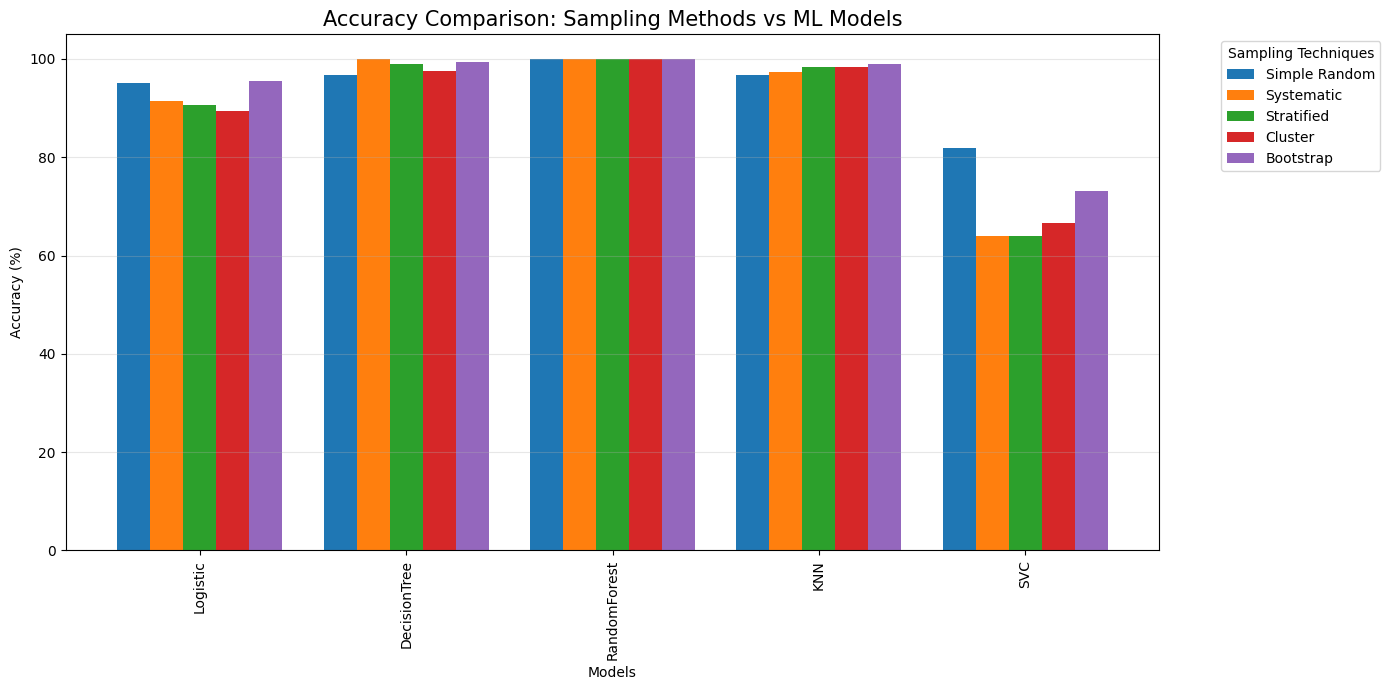

In [39]:
# Visualization: Model Comparison
plt.figure(figsize=(14, 7))
res_matrix.astype(float).plot(kind='bar', width=0.8, ax=plt.gca())
plt.title("Accuracy Comparison: Sampling Methods vs ML Models", fontsize=15)
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.legend(title="Sampling Techniques", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

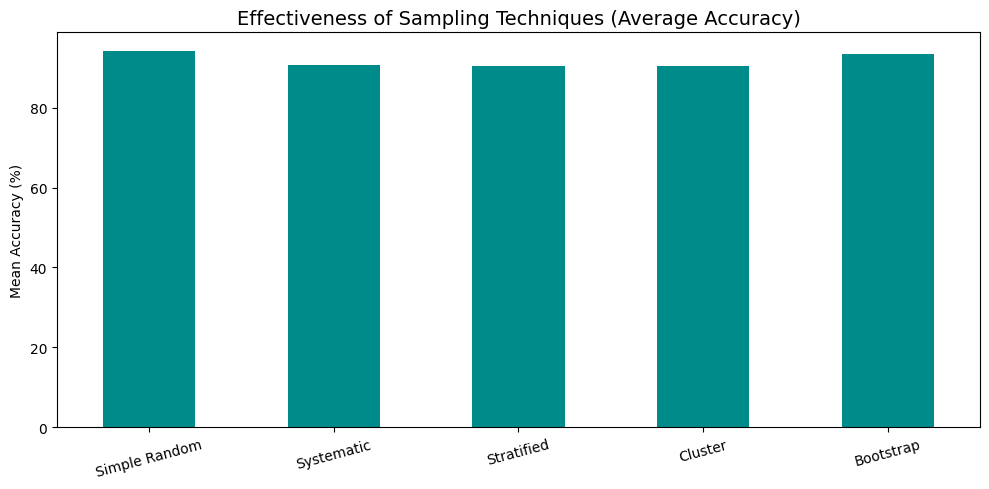

In [40]:
# Visualization: Average Accuracy per Sampling Technique
plt.figure(figsize=(10, 5))
res_matrix.astype(float).mean().plot(kind='bar', color='darkcyan')
plt.title("Effectiveness of Sampling Techniques (Average Accuracy)", fontsize=14)
plt.ylabel("Mean Accuracy (%)")
plt.xticks(rotation=15)
plt.tight_layout()